In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


Toy Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
A simple dataset to learn the basics.
3 flowers of Iris species. [see images on wikipedia link above]
Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg

# Objective: 
Classify a new flower as belonging to one of the 3 classes given the 4 features.
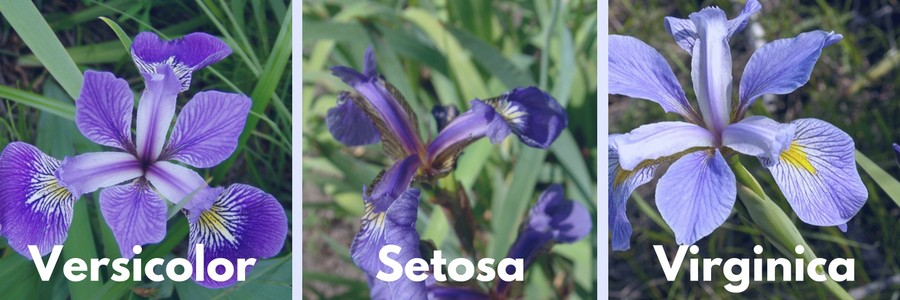



# Importance of domain knowledge.
Why use petal and sepal dimensions as features?
Why do we not use 'color' as a feature?
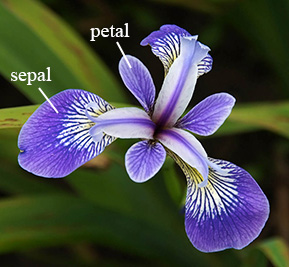

# Iris Flower Dataset :
Iris is the family in the flower which contains the several species such as the setosa,versicolor,virginica,etc.
# The data set consists of: 
#150 samples 
#3 labels: species of Iris (Iris setosa, Iris virginica and Iris versicolor) 
#4 features: Sepal length,Sepal width,Petal length,Petal Width in cm

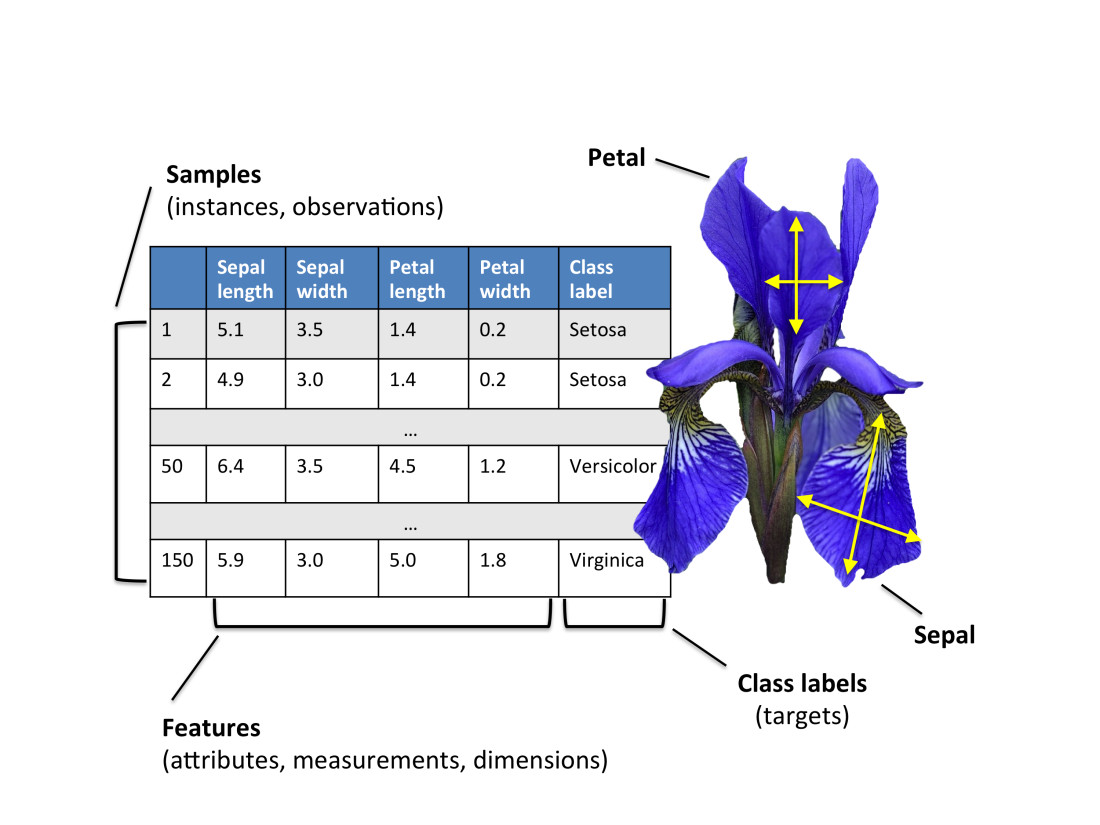


In [19]:
# downLoading Iris.csv into a pandas dataFrame.
iris = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

# Data inspection and Data understanding

In [20]:
# random sample by percentage or by fraction 0.50
#iris.sample(frac=0.01)
iris.sample(5)  # picking random sample data than using head and tail. 

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
148,6.2,3.4,5.4,2.3,virginica
50,7.0,3.2,4.7,1.4,versicolor
97,6.2,2.9,4.3,1.3,versicolor
42,4.4,3.2,1.3,0.2,setosa


In [26]:
# data inspection, checking null values
iris.isna().sum()  

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
# (Q) whats the memory usage by the dataset??
# (Q) how many data-points and features? i.e. rows and columns
# (Q) What are the column names in our dataset?
# (Q) How many data points for each class are present?
iris.info()  #checking null values, dtypes, memory usage, columns and rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [29]:
#(Q) How many flowers for each species are present?
#(Q)Is this dataset balanced??

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

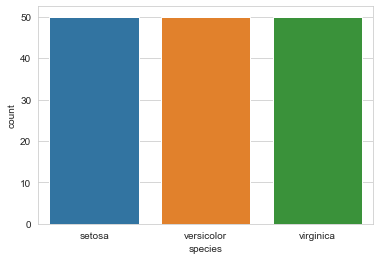

In [85]:
#visualising the balance of the iris dataset
import seaborn as sns
sns.countplot(iris['species'],label='count')

In [28]:
#statiscal discribtion of data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2D scatter plot

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



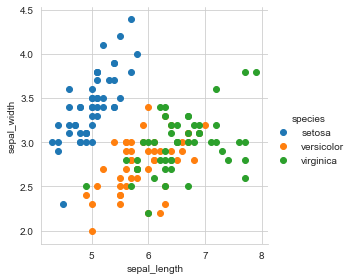

In [32]:
import seaborn as sns
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?

Observation(s):
#Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
#Seperating Versicolor from Viginica is much harder as they have considerable overlap.

# 3D - scatter plot for better visibility

In [33]:
import plotly.express as px
iris = px.data.iris()
fig = px.scatter_3d(iris, x='petal_length', y='petal_width', z='sepal_width',
              color='species')
fig.show()

** 3D Scatter plot**
https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).


# Histograms and Probability Density Functions (PDF)

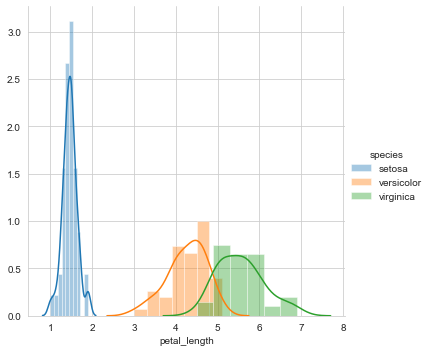

In [78]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

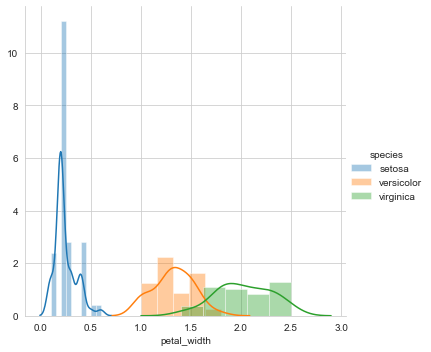

In [79]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

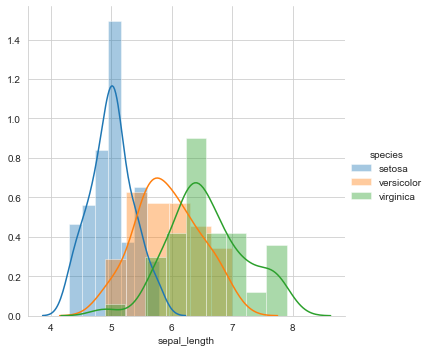

In [80]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

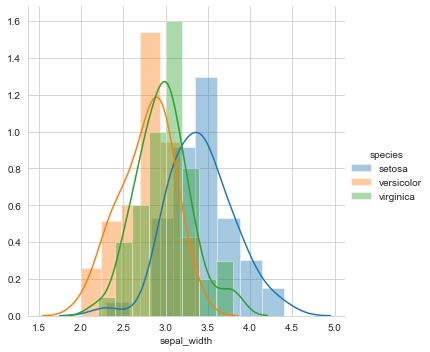

In [81]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

In [86]:
#encode the categorical data values(converting categorical data into numerical)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
labelencoder_Y.fit_transform(iris.iloc[:, -1].values)  #since the index location of specis at -1, impeding array


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [88]:
iris.iloc[:, 1]=labelencoder_Y.fit_transform(iris.iloc[:, 1].values) #putting back into data frame

In [91]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
79,5.7,5,3.5,1.0,versicolor,2
30,4.8,10,1.6,0.2,setosa,1
18,5.7,17,1.7,0.3,setosa,1
1,4.9,9,1.4,0.2,setosa,1
98,5.1,4,3.0,1.1,versicolor,2
44,5.1,17,1.9,0.4,setosa,1
118,7.7,5,6.9,2.3,virginica,3
88,5.6,9,4.1,1.3,versicolor,2
26,5.0,13,1.6,0.4,setosa,1
27,5.2,14,1.5,0.2,setosa,1


In [93]:
# changing catergorical data from 'Diagnosis' column as
# setosa=1, versicolor =2,  and virginica=3
num_values={'species' : {'setosa':1, 'versicolor':2,  'virginica':3}}
iris.replace(num_values, inplace=True)

In [94]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
110,6.5,11,5.1,2.0,3,3
68,6.2,1,4.5,1.5,2,2
84,5.4,9,4.5,1.5,2,2
10,5.4,16,1.5,0.2,1,1
32,5.2,20,1.5,0.1,1,1


In [116]:
#deleting the species_id column permanently.  now we have numerical dataset
#iris.drop('species_id', axis='columns')
## axis can be =1 also

# Box plot and Whiskers

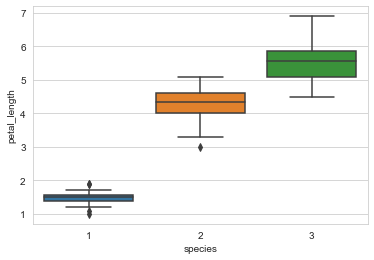

In [110]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

In [119]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.111598,0.871754,0.817954,0.782561
sepal_width,-0.111598,1.000000,-0.422243,-0.358281,-0.421028
petal_length,0.871754,-0.422243,1.000000,0.962757,0.949043
petal_width,0.817954,-0.358281,0.962757,1.000000,0.956464
species,0.782561,-0.421028,0.949043,0.956464,1.000000


*Obervation* from the above we can notice that petal_length, Petal_width are has postive correlation to species

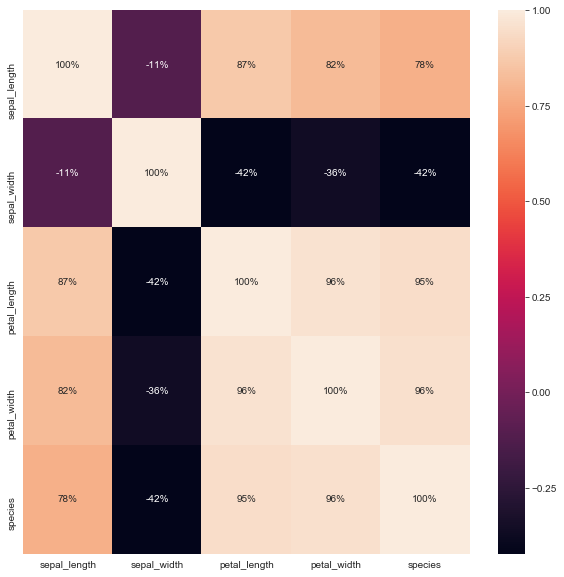

In [121]:
#visualising the correlation
plt.figure(figsize=(10,10))
sns.heatmap(iris.corr(), annot=True, fmt='.0%')

# splitting the dataset  

In [122]:
#splitting te dataset into independent (x) and dependent (y)
x=iris.iloc[:,:-1].values     #.values converts dataframe into arrays
y=iris.iloc[:,-1].values  ## species column as y axis

In [129]:
x.shape

(150, 4)

In [130]:
y.shape

(150,)

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [134]:
# split the data set into train and test
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=0)

In [137]:
print('The Shape of x_train is',x_train.shape)
print('The Shape of x_test is',x_test.shape)
print('The Shape of y_train is',y_train.shape)
print('The Shape of y_test is',y_test.shape)

The Shape of x_train is (105, 4)
The Shape of x_test is (45, 4)
The Shape of y_train is (105,)
The Shape of y_test is (45,)


# Building and training the models

In [153]:
# defining a  function for the models
def models (x_train, y_train):
    
    #logistic regression
    log = LogisticRegression(random_state=0).fit(x_train, y_train)
    
    #gaussian Naive Bayes 
    nb = GaussianNB().fit(x_train, y_train)
    
    #Decesion tree 
    tree = DecisionTreeClassifier(criterion="entropy", random_state=0).fit(x_train, y_train)
    
    #Random Forest Classifier 
    forest = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0).fit(x_train, y_train)
    
    # K-NN classifier
    knn=neighbors.KNeighborsClassifier().fit(x_train,y_train)
    
    # Support vector classifier
    sv = SVC(kernel='linear', C=1).fit(x_train,y_train)
    
        #print models accuracy on the training data
    print("[0]Logistic Regression training accuracy:",log.score(x_train, y_train))
    print("[1]Gaussian Naive Bayes training accuracy:",nb.score(x_train, y_train))
    print("[2]Decesion tree training accuracy:",tree.score(x_train, y_train))
    print("[3]Random Forest training accuracy:",forest.score(x_train, y_train))
    print("[4]K-Nearest Neighbour training accuracy:",knn.score(x_train, y_train))
    print("[5]Support Vector Classifier training accuracy:",sv.score(x_train, y_train))
    return log, nb, tree, forest, knn, sv

# calling the above models
model=models(x_train, y_train)
    

[0]Logistic Regression training accuracy: 0.9142857142857143
[1]Gaussian Naive Bayes training accuracy: 0.9428571428571428
[2]Decesion tree training accuracy: 1.0
[3]Random Forest training accuracy: 0.9904761904761905
[4]K-Nearest Neighbour training accuracy: 0.9428571428571428
[5]Support Vector Classifier training accuracy: 0.9809523809523809


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



**Observation**: Decession Tree training accurancy is 100% compared to other algoritms

# Testing the model

In [161]:
#test model accuracy on test data on confusion matrix

cm = confusion_matrix(y_test, model[2].predict(x_test))
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [162]:
#test model accuracy score on test data for all models

for i in range(len(model)):
    print('model', i)
    print(classification_report(y_test, model[i].predict(x_test)))
    print(accuracy_score(y_test, model[i].predict(x_test)))     
    print()

model 0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.56      0.71        18
           3       0.58      1.00      0.73        11

    accuracy                           0.82        45
   macro avg       0.86      0.85      0.82        45
weighted avg       0.90      0.82      0.82        45

0.8222222222222222

model 1
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

1.0

model 2
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.94      0.97        18
           3       0.92   

***Obervation*** : From above results we can conclude Naive Base algoritm gave 100% accuracy on test data as compared to other all algoithms

# Cross Validation

In [163]:
grid={"C":np.logspace(-3,3,20), "penalty":["l1","l2"]}# l1 and l2 regularization
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: Future

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logis

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logis

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logis

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logis

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: Future

D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be cha

D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be cha

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, incr

D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class o

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be cha

tuned hpyerparameters :(best parameters)  {'C': 6.158482110660261, 'penalty': 'l1'}
accuracy : 0.9809523809523809


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: Future

In [164]:
# tuned hpyerparameters :(best parameters)  {'C': 6.158482110660261, 'penalty': 'l1'}
# accuracy : 0.9809523809523809

In [166]:
logreg2=LogisticRegression(C=6.158482110660261, penalty="l1")
logreg2.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=6.158482110660261, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
# Model is trained now we test the model using test data
pred=logreg2.predict(x_test)

In [180]:
# comparision using Cross Validation results on test data using Logistic Reggression
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n Accuracy for Test Data WITH Cross Validation for Logistic Regg. is %d%%' % (acc))


accModel = accuracy_score(y_test, model[0].predict(x_test), normalize=True) * float(100)
print('\n Accuracy for Test Data WITHOUT Cross Validation for Logistic Regg. is %d%%' % (accModel))


 Accuracy for Test Data WITH Cross Validation for Logistic Regg. is 93%

 Accuracy for Test Data WITHOUT Cross Validation for Logistic Regg. is 82%


In [183]:
print('classification_report WITH Cross Validation:- ')
print(classification_report(y_test,pred))
print('\n\nclassification_report WITHOUT Cross Validation:- ')
print(classification_report(y_test, model[0].predict(x_test)))

classification_report WITH Cross Validation:- 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.83      0.91        18
           3       0.79      1.00      0.88        11

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



classification_report WITHOUT Cross Validation:- 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.56      0.71        18
           3       0.58      1.00      0.73        11

    accuracy                           0.82        45
   macro avg       0.86      0.85      0.82        45
weighted avg       0.90      0.82      0.82        45



**Observation**: using cross validation in logistic regression gives better accuracy